In [54]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Importing and Reading Combined Data

In [57]:
df = pd.read_csv('combined.csv')
df

,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,lease_remain_years
0,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,418.541691,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0,70,62
1,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,418.541691,2015-12,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,10 TO 12,60.0,Improved,1986,275000.0,69,62
2,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,418.541691,2016-05,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,69.0,Improved,1986,310000.0,68,62
3,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,418.541691,2016-06,ANG MO KIO,2 ROOM,174,ANG MO KIO AVE 4,07 TO 09,45.0,Improved,1986,253000.0,68,62
4,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,418.541691,2016-11,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,290000.0,68,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224486,1.444637,103.829635,118A,CANBERRA CRESCENT,751118,118A CANBERRA CRES,18034.887863,172.699746,2024-07,SEMBAWANG,2 ROOM,118A,CANBERRA CRES,10 TO 12,47.0,Model A,2020,418000.0,94 years 11 months,96
224487,1.444637,103.829635,118A,CANBERRA CRESCENT,751118,118A CANBERRA CRES,18034.887863,172.699746,2024-08,SEMBAWANG,2 ROOM,118A,CANBERRA CRES,04 TO 06,38.0,Model A,2020,330000.0,94 years 10 months,96
224488,1.444637,103.829635,118A,CANBERRA CRESCENT,751118,118A CANBERRA CRES,18034.887863,172.699746,2024-08,SEMBAWANG,4 ROOM,118A,CANBERRA CRES,07 TO 09,92.0,Model A,2020,787000.0,94 years 10 months,96
224489,1.444796,103.830160,117B,CANBERRA CRESCENT,752117,117B CANBERRA CRES,18044.574080,196.770412,2024-07,SEMBAWANG,3 ROOM,117B,CANBERRA CRES,07 TO 09,68.0,Model A,2020,490000.0,94 years 10 months,96


In [59]:
df.dtypes

latitude               float64
longitude              float64
blk_no                  object
road_name               object
postal_code             object
address                 object
cbd_dist               float64
min_dist_mrt           float64
month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease         object
lease_remain_years       int64
dtype: object

In [61]:
df.isnull().sum()

latitude                0
longitude               0
blk_no                 16
road_name               0
postal_code             0
address                 0
cbd_dist                0
min_dist_mrt            0
month                   0
town                    0
flat_type               0
block                   0
street_name             0
storey_range            0
floor_area_sqm          0
flat_model              0
lease_commence_date     0
resale_price            0
remaining_lease         0
lease_remain_years      0
dtype: int64

In [63]:
df=df.dropna()
df.isnull().sum()

latitude               0
longitude              0
blk_no                 0
road_name              0
postal_code            0
address                0
cbd_dist               0
min_dist_mrt           0
month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
lease_remain_years     0
dtype: int64

# Minor Data Preprocessing for Combined Data

In [65]:
import statistics

def get_median(x):
    try:
        split_list = x.split(' TO ')
        float_list = [float(i) for i in split_list]
        median = statistics.median(float_list)
        return median
    except ValueError:
        return None  

df['storey_median'] = df['storey_range'].apply(lambda x: get_median(x))
df    


,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt,month,town,...,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,lease_remain_years,storey_median
0,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,418.541691,2015-01,ANG MO KIO,...,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0,70,62,8.0
1,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,418.541691,2015-12,ANG MO KIO,...,174,ANG MO KIO AVE 4,10 TO 12,60.0,Improved,1986,275000.0,69,62,11.0
2,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,418.541691,2016-05,ANG MO KIO,...,174,ANG MO KIO AVE 4,04 TO 06,69.0,Improved,1986,310000.0,68,62,5.0
3,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,418.541691,2016-06,ANG MO KIO,...,174,ANG MO KIO AVE 4,07 TO 09,45.0,Improved,1986,253000.0,68,62,8.0
4,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,418.541691,2016-11,ANG MO KIO,...,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,290000.0,68,62,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224486,1.444637,103.829635,118A,CANBERRA CRESCENT,751118,118A CANBERRA CRES,18034.887863,172.699746,2024-07,SEMBAWANG,...,118A,CANBERRA CRES,10 TO 12,47.0,Model A,2020,418000.0,94 years 11 months,96,11.0
224487,1.444637,103.829635,118A,CANBERRA CRESCENT,751118,118A CANBERRA CRES,18034.887863,172.699746,2024-08,SEMBAWANG,...,118A,CANBERRA CRES,04 TO 06,38.0,Model A,2020,330000.0,94 years 10 months,96,5.0
224488,1.444637,103.829635,118A,CANBERRA CRESCENT,751118,118A CANBERRA CRES,18034.887863,172.699746,2024-08,SEMBAWANG,...,118A,CANBERRA CRES,07 TO 09,92.0,Model A,2020,787000.0,94 years 10 months,96,8.0
224489,1.444796,103.830160,117B,CANBERRA CRESCENT,752117,117B CANBERRA CRES,18044.574080,196.770412,2024-07,SEMBAWANG,...,117B,CANBERRA CRES,07 TO 09,68.0,Model A,2020,490000.0,94 years 10 months,96,8.0


In [67]:
scope_df = df[['cbd_dist', 'min_dist_mrt', 'floor_area_sqm', 'lease_remain_years', 'storey_median', 'resale_price']]
scope_df

,cbd_dist,min_dist_mrt,floor_area_sqm,lease_remain_years,storey_median,resale_price
0,10296.855747,418.541691,60.0,62,8.0,255000.0
1,10296.855747,418.541691,60.0,62,11.0,275000.0
2,10296.855747,418.541691,69.0,62,5.0,310000.0
3,10296.855747,418.541691,45.0,62,8.0,253000.0
4,10296.855747,418.541691,61.0,62,5.0,290000.0
...,...,...,...,...,...,...
224486,18034.887863,172.699746,47.0,96,11.0,418000.0
224487,18034.887863,172.699746,38.0,96,5.0,330000.0
224488,18034.887863,172.699746,92.0,96,8.0,787000.0
224489,18044.574080,196.770412,68.0,96,8.0,490000.0


In [71]:
scope_df = scope_df.drop_duplicates()
scope_df

,cbd_dist,min_dist_mrt,floor_area_sqm,lease_remain_years,storey_median,resale_price
0,10296.855747,418.541691,60.0,62,8.0,255000.0
1,10296.855747,418.541691,60.0,62,11.0,275000.0
2,10296.855747,418.541691,69.0,62,5.0,310000.0
3,10296.855747,418.541691,45.0,62,8.0,253000.0
4,10296.855747,418.541691,61.0,62,5.0,290000.0
...,...,...,...,...,...,...
224486,18034.887863,172.699746,47.0,96,11.0,418000.0
224487,18034.887863,172.699746,38.0,96,5.0,330000.0
224488,18034.887863,172.699746,92.0,96,8.0,787000.0
224489,18044.574080,196.770412,68.0,96,8.0,490000.0


# Checking and Handling for Skewness in the Data

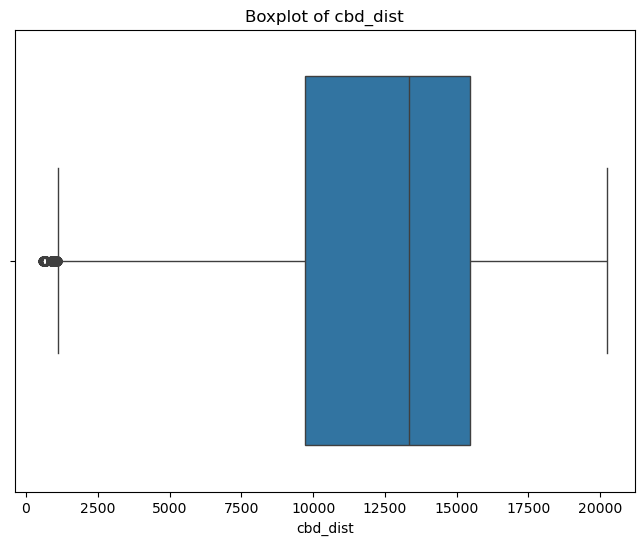

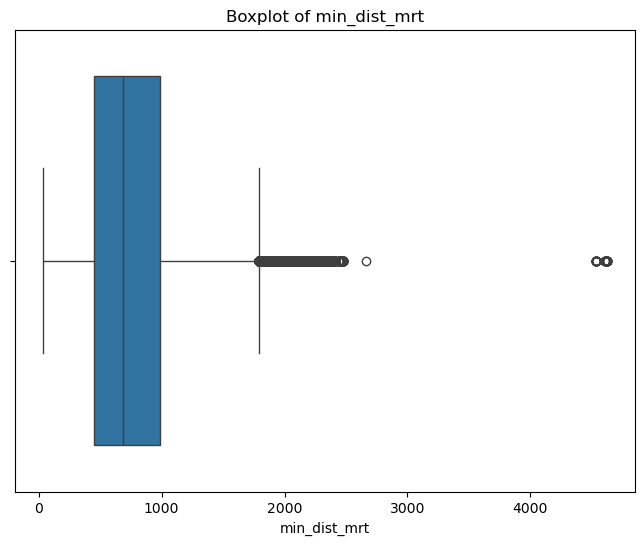

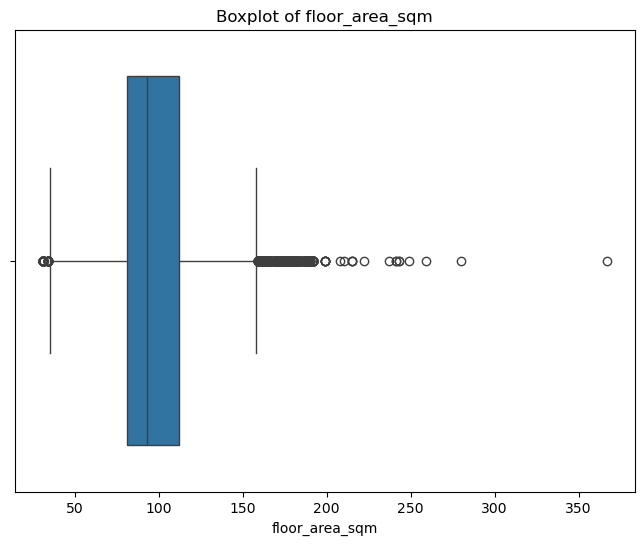

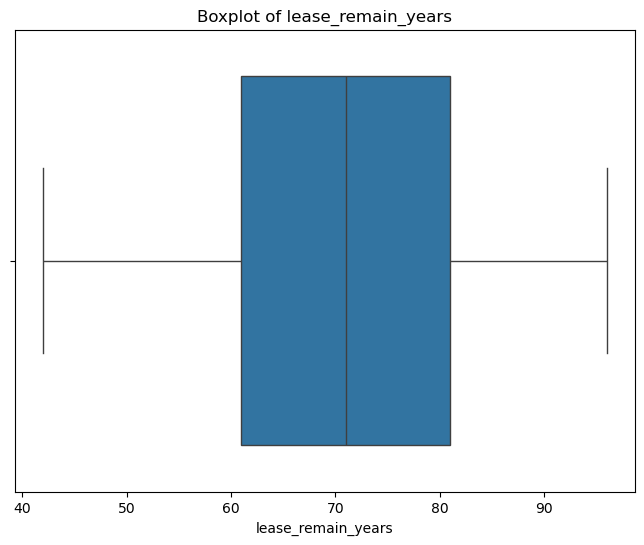

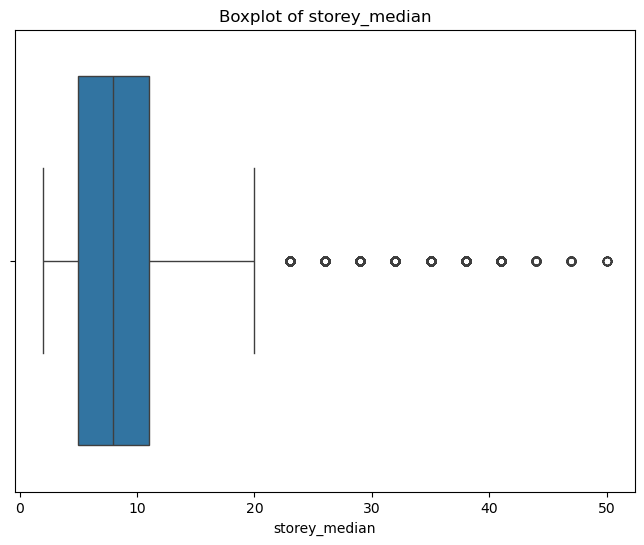

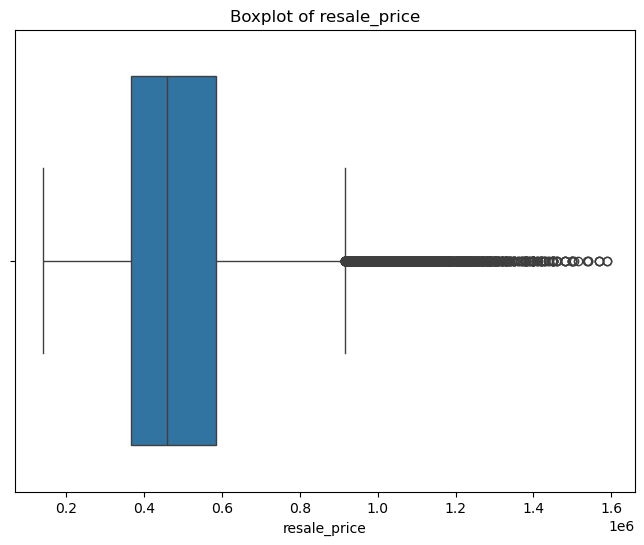

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns(continuous variables) for finding skewness
col = ['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median','resale_price']

for i in col:
    plt.figure(figsize=(8, 6))  
    sns.boxplot(data=df, x=i)
    plt.title(f'Boxplot of {i}')
    plt.xlabel(i)
    plt.show()

In [76]:
df1 = scope_df

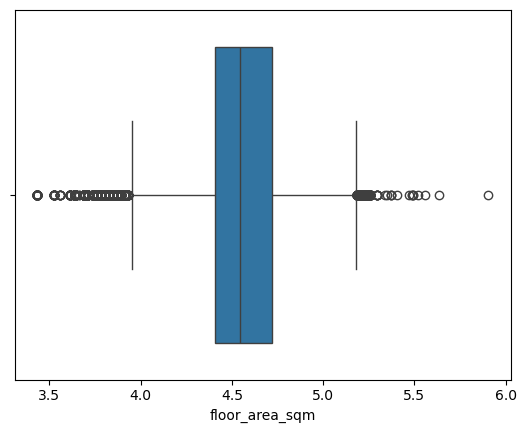

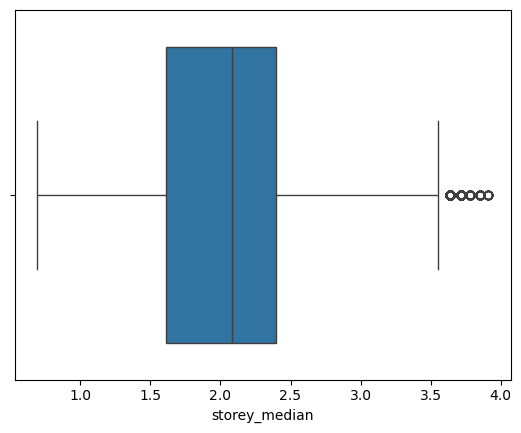

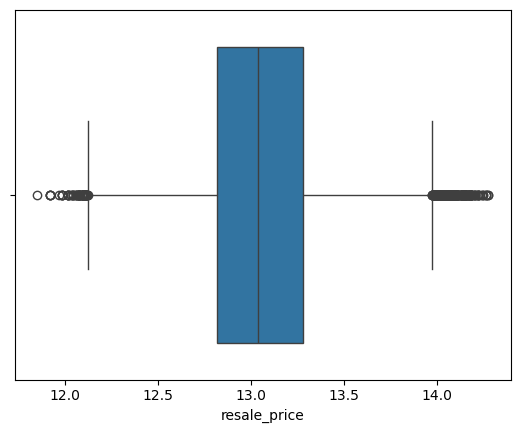

In [78]:
# Apply log transformation to reduce skewness
df1['floor_area_sqm'] = np.log(df1['floor_area_sqm'])
sns.boxplot(x='floor_area_sqm', data=df1)
plt.show()

df1['storey_median'] = np.log(df1['storey_median'])
sns.boxplot(x='storey_median', data=df1)
plt.show()

df1['resale_price'] = np.log(df1['resale_price'])
sns.boxplot(x='resale_price', data=df1)
plt.show()


In [80]:
df1.dtypes

cbd_dist              float64
min_dist_mrt          float64
floor_area_sqm        float64
lease_remain_years      int64
storey_median         float64
resale_price          float64
dtype: object

# Visualization among different columns using Correlation Matrix

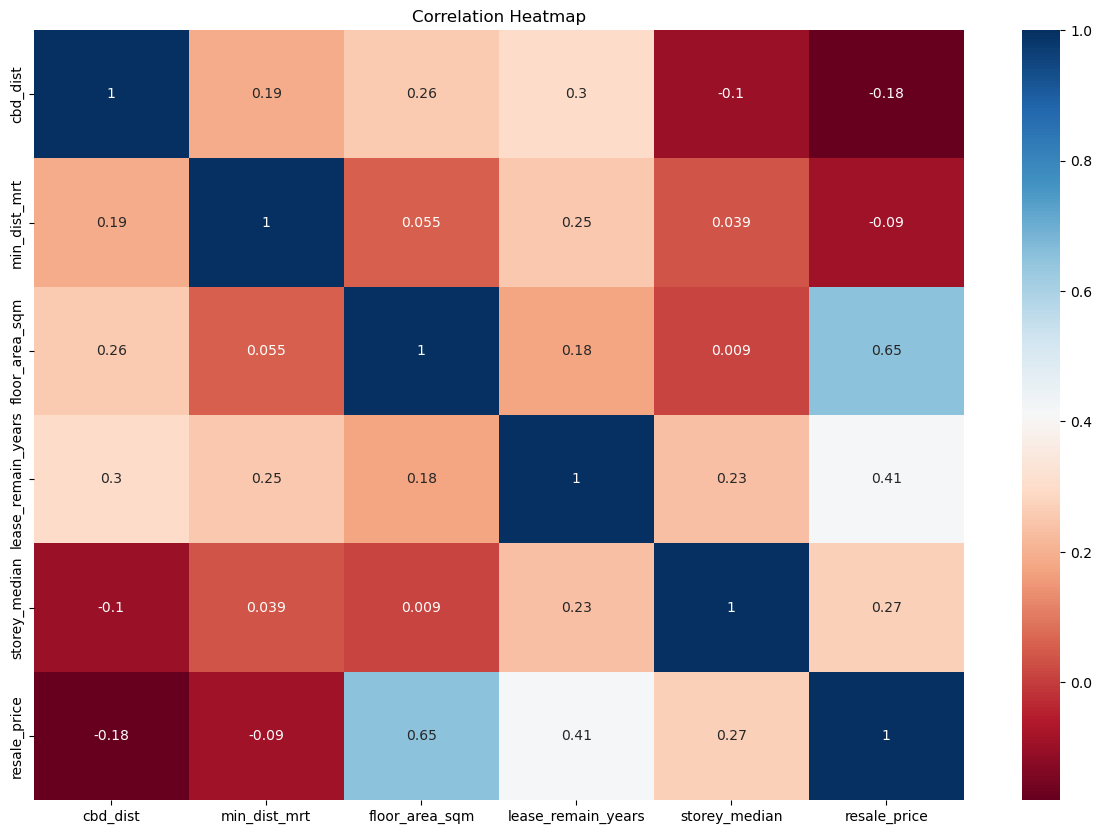

In [83]:
import seaborn as sns

corrMatrix = df1.corr()
plt.figure(figsize=(15, 10))
plt.title("Correlation Heatmap")
sns.heatmap(
    corrMatrix, 
    xticklabels=corrMatrix.columns,
    yticklabels=corrMatrix.columns,
    cmap='RdBu', 
    annot=True
)
plt.show()
         

# Encoding Data

In [86]:
from sklearn.preprocessing import StandardScaler

# Select features and target variable
X = df1[['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median']]
y = df1['resale_price']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [88]:
test_dataframe = pd.DataFrame(X)
test_dataframe

,0,1,2,3,4
0,-0.490761,-0.812722,-1.761206,-0.678432,0.211737
1,-0.490761,-0.812722,-1.761206,-0.678432,0.654924
2,-0.490761,-0.812722,-1.217125,-0.678432,-0.442359
3,-0.490761,-0.812722,-2.881125,-0.678432,0.211737
4,-0.490761,-0.812722,-1.696858,-0.678432,-0.442359
...,...,...,...,...,...
217688,1.268813,-1.384031,-2.711842,1.808269,0.654924
217689,1.268813,-1.384031,-3.539324,1.808269,-0.442359
217690,1.268813,-1.384031,-0.097205,1.808269,0.211737
217691,1.271015,-1.328094,-1.273957,1.808269,0.211737


# Splitting the Data for Training and Testing Purposes

In [91]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


# Decision Tree Regressor

In [96]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np

# Decision Tree Regressor
dtr = DecisionTreeRegressor()

# Hyperparameters
param_grid = {
    'max_depth': [2, 5, 10, 15, 20, 22],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
    'max_features': ['auto', 'sqrt', 'log2']
}

# GridSearchCV
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)

# Best model and predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nMean squared error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean squared error:", rmse)
print("\nR-squared:", r2)


Best hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 4}

Mean squared error: 0.018857763731083724
Mean Absolute Error: 0.11031488133951219
Root Mean squared error: 0.13732357310776516

R-squared: 0.8306330517352254


# Testing Our Trained Model (Decision Tree Regressor)

In [99]:
new_sample = np.array([[8740, 999, np.log(44), 55, np.log(11)]])
new_sample = scaler.transform(new_sample[:, :5])
new_pred = best_model.predict(new_sample)[0]
resale_price_pred = np.exp(new_pred)

print("Predicted Resale Price:", resale_price_pred)


Predicted Resale Price: 231171.27128616688


In [101]:
import pickle

# Save the best model
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
